# [프로젝트] 서울시 공공자전거 분석

--------------------------------------------------------------------------------------------------------------------------------------

# 출처
https://data.seoul.go.kr/dataList/OA-15182/F/1/datasetView.do 에서

서울특별시 공공자전거 대여이력 정보 활용

배경

모빌리티 공유서비스는 이용량이 증가하고있다.
그에 따라 공유 모빌리티 양이 증가하고 있고 효율적인 관리를 통한 고객 유치에 힘써야한다. 

서울시 공공자전거인 "따릉이"는 지정된 대여소가 있고 대여소별 평균 자전거 갯수는 큰 차이를 보인다.

예를 들어, 아파트 주변에는 50대가 넘게 주차된 구역이 있는 반면 한대도 없는 대여소도 많다.

프로젝트 목표

따릉이 이용량 분석을 통해 유의미한 정보를 도출하고 더 효율적인 관리를 목표로 한다.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#데이터 불러오기
seoul = pd.read_csv('./공공자전거.csv', encoding='cp949')

#상위 10개 데이터 출력
seoul.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-59614,2022-06-01 06:36:04,668,서울축산농협(장안지점),0,2022-06-01 06:47:51,3,중랑센터,0,11,1970.00
1,SPB-33195,2022-06-01 07:57:48,529,장한평역 8번 출구 앞,0,2022-06-01 08:22:40,3,중랑센터,0,24,2076.38
2,SPB-56997,2022-06-01 12:26:32,529,장한평역 8번 출구 앞,0,2022-06-01 12:35:09,3,중랑센터,0,8,1370.00
3,SPB-51938,2022-06-01 21:10:16,3560,성동구 견인차량 보관소 앞,0,2022-06-01 21:24:59,3,중랑센터,0,14,1910.00
4,SPB-63085,2022-06-02 08:29:11,529,장한평역 8번 출구 앞,0,2022-06-02 08:33:24,3,중랑센터,0,4,2290.00
5,SPB-82108,2022-06-02 08:46:31,646,장한평역 1번출구,99,2022-06-02 08:53:14,3,중랑센터,99,6,1480.00
6,SPB-44360,2022-06-02 12:24:56,529,장한평역 8번 출구 앞,0,2022-06-02 12:31:06,3,중랑센터,0,6,1005.15
7,SPB-52401,2022-06-02 12:24:04,529,장한평역 8번 출구 앞,0,2022-06-02 12:32:38,3,중랑센터,0,8,1821.83
8,SPB-39634,2022-06-02 12:40:20,646,장한평역 1번출구,0,2022-06-02 12:46:48,3,중랑센터,0,6,909.18
9,SPB-48966,2022-06-03 03:49:31,605,신설동역8번출구,0,2022-06-03 04:09:17,3,중랑센터,0,19,4851.86


In [3]:
#데이터 프레임 요약 출력
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196985 entries, 0 to 4196984
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   int64  
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      int64  
 10  이용거리      float64
dtypes: float64(1), int64(5), object(5)
memory usage: 352.2+ MB


In [4]:
seoul.describe()

,대여 대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,4.196985e+06,4.196985e+06,4.196985e+06,4.196985e+06,4.196985e+06,4.196985e+06
mean,1.958480e+03,3.812681e+00,1.960405e+03,3.804472e+00,2.271690e+01,2.738117e+03
std,1.434555e+03,1.905043e+01,1.423324e+03,1.903073e+01,2.660410e+01,3.334007e+03
min,3.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.690000e+02,0.000000e+00,7.710000e+02,0.000000e+00,7.000000e+00,9.016100e+02
50%,1.608000e+03,0.000000e+00,1.606000e+03,0.000000e+00,1.300000e+01,1.610000e+03
75%,2.903000e+03,0.000000e+00,2.904000e+03,0.000000e+00,2.900000e+01,3.130000e+03
max,9.999900e+04,9.900000e+01,9.999900e+04,9.900000e+01,1.428000e+03,1.433733e+05


In [5]:
#필요없는 coulmn 지우기
seoul_del = seoul.drop(columns = ['대여 대여소번호','대여거치대','반납대여소번호','반납거치대'])
seoul_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196985 entries, 0 to 4196984
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   자전거번호    object 
 1   대여일시     object 
 2   대여 대여소명  object 
 3   반납일시     object 
 4   반납대여소명   object 
 5   이용시간     int64  
 6   이용거리     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 224.1+ MB


In [6]:
#자전거번호 앞에있는 'SPB-' 빼고 int로 바꾸기
자전거번호_숫자만 = seoul_del['자전거번호'].str.split('-').str[1]

In [7]:
seoul_del['자전거번호'] = 자전거번호_숫자만
seoul_del['자전거번호'] = seoul_del['자전거번호'].astype('int64')

In [8]:
# 날짜정보 split
대여며칠인지 = seoul_del['대여일시'].str.split(' ').str[0].str.split('-').str[-1]

In [9]:
seoul_del['대여일시'] = 대여며칠인지
seoul_del['대여일시'] = seoul_del['대여일시'].astype('int64')

In [10]:
seoul_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196985 entries, 0 to 4196984
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   자전거번호    int64  
 1   대여일시     int64  
 2   대여 대여소명  object 
 3   반납일시     object 
 4   반납대여소명   object 
 5   이용시간     int64  
 6   이용거리     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 224.1+ MB


<AxesSubplot:>

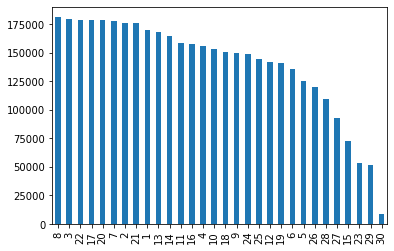

In [11]:
seoul_del['대여일시'].value_counts().plot(kind='bar')

In [12]:
#일자별로 sort
seoul_del['대여일시'].value_counts(sort=False)

1     170048
2     175895
3     179010
4     156057
5     125360
6     135462
7     177698
8     181083
9     149323
10    153399
11    158046
12    141756
13    167656
14    164028
15     72395
16    157328
17    178524
18    150736
19    141254
20    178103
21    175428
22    178849
23     53565
24    149083
25    144163
26    120153
27     92875
28    109655
29     51455
30      8598
Name: 대여일시, dtype: int64

In [13]:
#대여횟수별 sort
seoul_del['대여일시'].value_counts()

8     181083
3     179010
22    178849
17    178524
20    178103
7     177698
2     175895
21    175428
1     170048
13    167656
14    164028
11    158046
16    157328
4     156057
10    153399
18    150736
9     149323
24    149083
25    144163
12    141756
19    141254
6     135462
5     125360
26    120153
28    109655
27     92875
15     72395
23     53565
29     51455
30      8598
Name: 대여일시, dtype: int64

In [14]:
#평균대여횟수
seoul_del['대여일시'].value_counts().mean()

139899.5

In [15]:
#대여 횟수가 많은 자전거 Top 10
seoul_del['자전거번호'].value_counts().head(10)

60176    373
63434    366
63092    365
63362    363
63313    356
63136    355
62945    354
63030    349
59854    349
59832    347
Name: 자전거번호, dtype: int64

In [16]:
#자전거별 이용시간 Top 10
seoul_del[['자전거번호', '이용시간']].groupby('자전거번호').count().sort_values('이용시간').tail(10)

,이용시간
자전거번호,
59832,347
63030,349
59854,349
62945,354
63136,355
63313,356
63362,363
63092,365
63434,366


In [17]:
len(set(seoul_del['대여 대여소명'])), len(set(seoul_del['반납대여소명']))

(2602, 2600)

In [18]:
# 대여는 있지만 반납이 없는곳 
set(seoul_del['대여 대여소명'])-set(seoul_del['반납대여소명'])

{'상암단말정비', '영남배송'}

In [19]:
a = []
for i in range(len(seoul_del)):
    if seoul_del["대여 대여소명"][i] == '영남배송' or seoul_del["대여 대여소명"][i] == '상암단말정비':
        a.append(i)

In [20]:
# 상암단말정비 1번, 영남배송 7번
seoul_del["대여 대여소명"][a]

399807     상암단말정비
1060565      영남배송
1081295      영남배송
1081463      영남배송
1081988      영남배송
1082096      영남배송
1083522      영남배송
1083930      영남배송
Name: 대여 대여소명, dtype: object

In [21]:
# 대여만 있고 반납이 없는 대여소 빼기
seoul_del['대여 대여소명'].value_counts().drop(index = ['영남배송','상암단말정비']).sort_index()

(시립)고덕평생학습관         901
(재)FITI시험연구원       2242
3645 구역삼세무서 교차로     853
3919 CGV구로 앞       1587
3호선 매봉역 3번출구앞      2280
                   ... 
흥국사 정류장             167
희성오피앙              1668
희훈타워빌 앞            2259
힐스테이트에코            4472
힐스테이트클래시안아파트       1329
Name: 대여 대여소명, Length: 2600, dtype: int64

In [22]:
seoul_del['반납대여소명'].value_counts().sort_index()

(시립)고덕평생학습관         898
(재)FITI시험연구원       2033
3645 구역삼세무서 교차로     867
3919 CGV구로 앞       1576
3호선 매봉역 3번출구앞      2381
                   ... 
흥국사 정류장             193
희성오피앙              1685
희훈타워빌 앞            2168
힐스테이트에코            4518
힐스테이트클래시안아파트       1331
Name: 반납대여소명, Length: 2600, dtype: int64

In [23]:
# 반납대여소명과 대여 대여소명 인덱스 값 맞추기
set(seoul_del['반납대여소명'].value_counts().sort_index().index == seoul_del['대여 대여소명'].value_counts().drop(index = ['영남배송','상암단말정비']).sort_index().index)

{True}

In [24]:
# 대여와 반납 횟수 차이
chi = (seoul_del['대여 대여소명'].value_counts().drop(index = ['영남배송','상암단말정비']).sort_index() - seoul_del['반납대여소명'].value_counts().sort_index())
chi

(시립)고덕평생학습관          3
(재)FITI시험연구원       209
3645 구역삼세무서 교차로    -14
3919 CGV구로 앞        11
3호선 매봉역 3번출구앞     -101
                  ... 
흥국사 정류장            -26
희성오피앙              -17
희훈타워빌 앞             91
힐스테이트에코            -46
힐스테이트클래시안아파트        -2
Length: 2600, dtype: int64

In [25]:
chi.sort_values()

뚝섬유원지역 1번출구 앞              -1314
암사역 3번출구(국민은행앞)            -1153
CJ 드림시티                    -1094
한강공원 망원나들목                 -1082
응암역2번출구 국민은행 앞             -1055
                            ... 
고덕역 4번출구                     950
우장산역 1번출구옆(우장산아이파크105동앞)    1104
온곡초교 교차로                    1127
신일해피트리아파트 앞                 1373
아차산역4번출구                    1433
Length: 2600, dtype: int64

In [26]:
# 대여보다 반납이 많은 곳
seoul_del['대여 대여소명'].value_counts().loc['뚝섬유원지역 1번출구 앞'],seoul_del['반납대여소명'].value_counts().loc['뚝섬유원지역 1번출구 앞']

(14056, 15370)

In [27]:
# 반납보다 대여가 많은 곳
seoul_del['대여 대여소명'].value_counts().loc['아차산역4번출구'],seoul_del['반납대여소명'].value_counts().loc['아차산역4번출구']

(3392, 1959)

In [28]:
# 횟수 차이가 거의 나지 않는 곳
seoul_del['대여 대여소명'].value_counts().loc['(시립)고덕평생학습관'],seoul_del['반납대여소명'].value_counts().loc['(시립)고덕평생학습관']

(901, 898)

## 활용정보
1. 자전거 한 대당 대여 횟수 또는 이용시간이 일정치를 넘어가면 점검함으로써 사고 예방과 품질 좋은 자전거 제공
2. 대여와 반납을 분석하여 반납이 적고 대여가 많은 곳이나 대여가 많은 곳을 분석하여 다른 지역 따릉이 이전 혹은 수리 후 리스폰 지역 추천

## 한계점
1. 몇년치 데이터를 받아서 csv 파일을 합친다음에 서울 날씨와 함께 AI모델링해서 계절이나 날씨별로 수요 예측 모델을 만들려고 했지만 데아터의 양이 너무 많고 시간이 부족해서 아직 못함
2. 데이터가 400만개가 넘지만 일별로 쪼개보면 6월 한달만으로는 요일이나 특정 날짜들과 수요의 연관성을 찾지 못함
3. 위치데이터의 좌표값을 활용해서 지도에 사용량을 지역별로 나타내고 싶었지만 정상적인 좌표값 데이터를 받아오는데 실패 